In [1]:
import numpy as np
import healpy as hp
import lsst.sims.featureScheduler as fs

target_maps = {}
nside = fs.set_default_nside(nside=32)  # Required

target_maps['u'] = fs.generate_goal_map(NES_fraction=0.,
                                        WFD_fraction=0.31, SCP_fraction=0.15,
                                        GP_fraction=0.15, nside=nside,
                                        generate_id_map=True)
target_maps['g'] = fs.generate_goal_map(NES_fraction=0.2,
                                        WFD_fraction=0.44, SCP_fraction=0.15,
                                        GP_fraction=0.15, nside=nside,
                                        generate_id_map=True)
target_maps['r'] = fs.generate_goal_map(NES_fraction=0.46,
                                        WFD_fraction=1.0, SCP_fraction=0.15,
                                        GP_fraction=0.15, nside=nside,
                                        generate_id_map=True)
target_maps['i'] = fs.generate_goal_map(NES_fraction=0.46,
                                        WFD_fraction=1.0, SCP_fraction=0.15,
                                        GP_fraction=0.15, nside=nside,
                                        generate_id_map=True)
target_maps['z'] = fs.generate_goal_map(NES_fraction=0.4,
                                        WFD_fraction=0.9, SCP_fraction=0.15,
                                        GP_fraction=0.15, nside=nside,
                                        generate_id_map=True)
target_maps['y'] = fs.generate_goal_map(NES_fraction=0.,
                                        WFD_fraction=0.9, SCP_fraction=0.15,
                                        GP_fraction=0.15, nside=nside,
                                        generate_id_map=True)

cloud_map = fs.utils.generate_cloud_map(target_maps,filtername='r',
                                        wfd_cloud_max=0.7, 
                                        scp_cloud_max=0.7, 
                                        gp_cloud_max=0.7, 
                                        nes_cloud_max=0.7)

filters = ['u', 'g', 'r', 'i', 'z', 'y']
surveys = []

for filtername in filters:
    bfs = []
    bfs.append(fs.M5_diff_basis_function(filtername=filtername, nside=nside))
    bfs.append(fs.Target_map_basis_function(filtername=filtername,
                                            target_map=target_maps[filtername][0],
                                            out_of_bounds_val=hp.UNSEEN, nside=nside))

    bfs.append(fs.MeridianStripeBasisFunction(nside=nside,width=(8.,16.,20.,),
                                              weight=(1,0.5,0.25),
                                              height=(80,80,80), 
                                              zenith_pad=(15.,30.,45.)))
    bfs.append(fs.Slewtime_basis_function(filtername=filtername, nside=nside))
    bfs.append(fs.Strict_filter_basis_function(filtername=filtername))
    bfs.append(fs.Avoid_Fast_Revists(filtername=filtername, gap_min=240., nside=nside))
    bfs.append(fs.Bulk_cloud_basis_function(max_cloud_map=cloud_map,nside=nside))

    weights = np.array([3.0, 0.5, 1., 3., 3., 3.,3.0])
    surveys.append(fs.Greedy_survey_fields(bfs, weights, block_size=1, 
                                           filtername=filtername, dither=True,
                                           nside=nside,
                                           tag_fields=True,
                                           tag_map=target_maps[filtername][1],
                                           tag_names=target_maps[filtername][2]))

# Set up pairs
surveys.append(fs.Pairs_survey_scripted([], [], ignore_obs='DD'))

# Set up the DD
# ELAIS S1
surveys.append(fs.Deep_drilling_survey(9.45, -44., sequence='rgizy',
                                       nvis=[20, 10, 20, 26, 20],
                                       survey_name='DD:ELAISS1', 
                                       reward_value=100, moon_up=None,
                                       fraction_limit=0.0185, 
                                       ha_limits=([0., 0.5], [23.5, 24.]),
                                       max_clouds=0.7,
                                       nside=nside))
surveys.append(fs.Deep_drilling_survey(9.45, -44., sequence='u',
                                       nvis=[7],
                                       survey_name='DD:u,ELAISS1', 
                                       reward_value=100, moon_up=False,
                                       fraction_limit=0.0015, 
                                       ha_limits=([0., 0.5], [23.5, 24.]),
                                       max_clouds=0.7,
                                       nside=nside))

# XMM-LSS
surveys.append(fs.Deep_drilling_survey(35.708333, -4-45/60., sequence='rgizy',
                                       nvis=[20, 10, 20, 26, 20],
                                       survey_name='DD:XMM-LSS', 
                                       reward_value=100, moon_up=None,
                                       fraction_limit=0.0185, 
                                       ha_limits=([0., 0.5], [23.5, 24.]),
                                       max_clouds=0.7,
                                       nside=nside))
surveys.append(fs.Deep_drilling_survey(35.708333, -4-45/60., sequence='u',
                                       nvis=[7],
                                       survey_name='DD:u,XMM-LSS', 
                                       reward_value=100, moon_up=False,
                                       fraction_limit=0.0015, 
                                       ha_limits=([0., 0.5], [23.5, 24.]),
                                       max_clouds=0.7,
                                       nside=nside))

# Extended Chandra Deep Field South
# XXX--Note, this one can pass near zenith. Should go back and add better planning on this.
surveys.append(fs.Deep_drilling_survey(53.125, -28.-6/60., sequence='rgizy',
                                       nvis=[20, 10, 20, 26, 20],
                                       survey_name='DD:ECDFS', 
                                       reward_value=100, moon_up=None,
                                       fraction_limit=0.0185, 
                                       ha_limits=[[0.5, 1.0], [23., 22.5]],
                                       max_clouds=0.7,
                                       nside=nside))
surveys.append(fs.Deep_drilling_survey(53.125, -28.-6/60., sequence='u',
                                       nvis=[7],
                                       survey_name='DD:u,ECDFS', 
                                       reward_value=100, moon_up=False,
                                       fraction_limit=0.0015, 
                                       ha_limits=[[0.5, 1.0], [23., 22.5]],
                                       max_clouds=0.7,
                                       nside=nside))
# COSMOS
surveys.append(fs.Deep_drilling_survey(150.1, 2.+10./60.+55/3600., sequence='rgizy',
                                       nvis=[20, 10, 20, 26, 20],
                                       survey_name='DD:COSMOS', 
                                       reward_value=100, moon_up=None,
                                       fraction_limit=0.0185, 
                                       ha_limits=([0., 0.5], [23.5, 24.]),
                                       max_clouds=0.7,
                                       nside=nside))
surveys.append(fs.Deep_drilling_survey(150.1, 2.+10./60.+55/3600., sequence='u',
                                       nvis=[7], 
                                       ha_limits=([0., .5], [23.5, 24.]),
                                       survey_name='DD:u,COSMOS', 
                                       reward_value=100, moon_up=False,
                                       fraction_limit=0.0015,
                                       max_clouds=0.7,
                                       nside=nside))


scheduler = fs.Core_scheduler(surveys, nside=nside)  # Required


In [2]:
import healpy as hp
import matplotlib.pyplot as plt

# Target goal map (per filter)

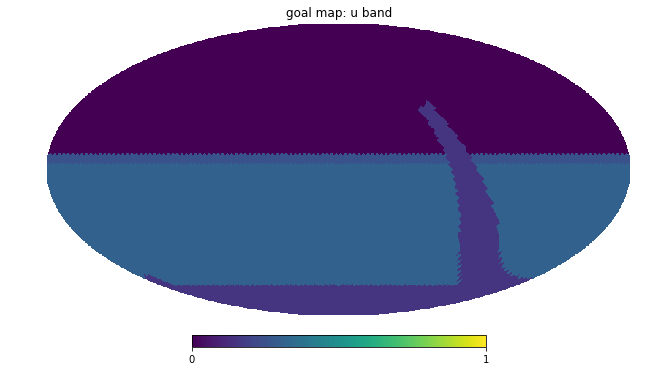

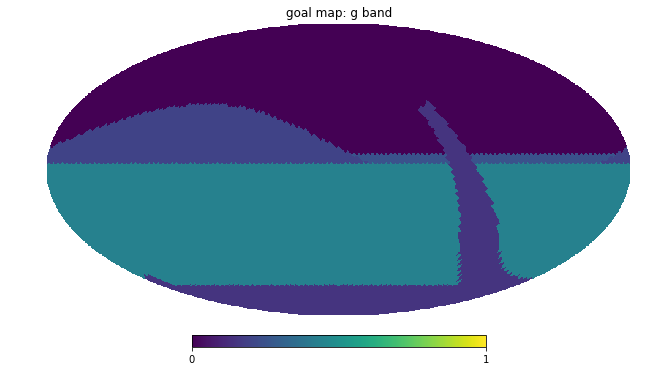

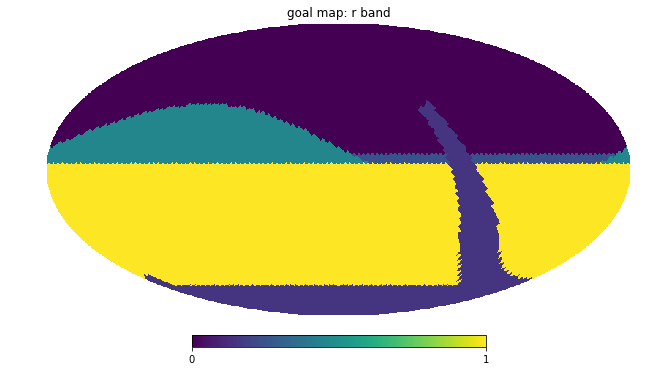

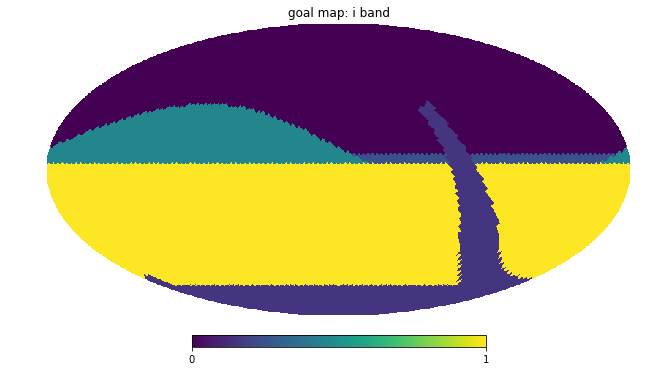

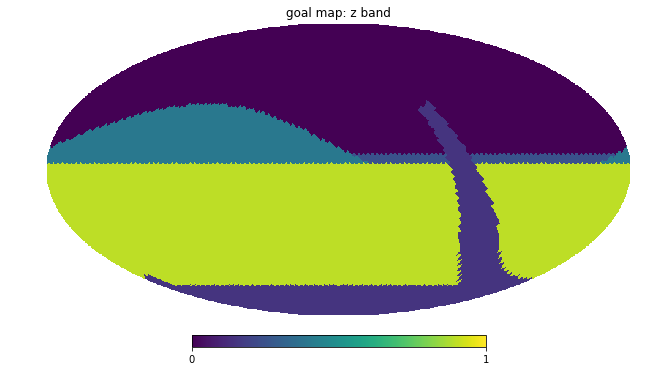

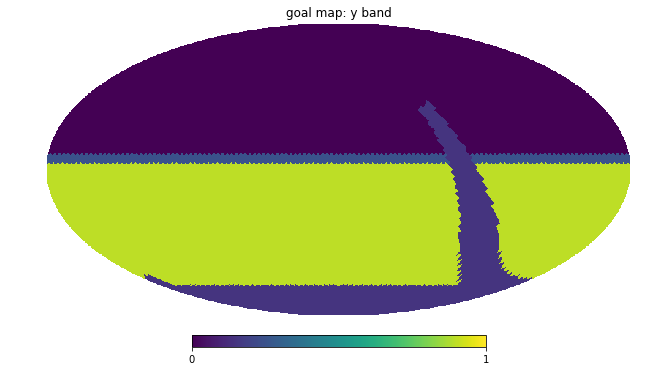

In [3]:
for f in filters:
    hp.mollview(target_maps[f][0],max=1,title = 'goal map: '+f+' band')

# Cloud Map

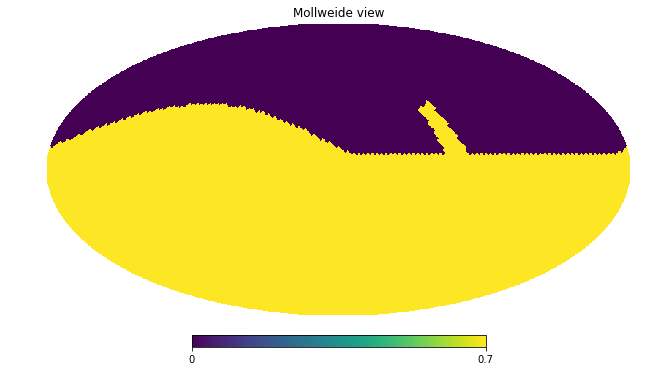

In [4]:
hp.mollview(cloud_map)

# MeridianStripeBasisFunction Map
```
bfs.append(fs.MeridianStripeBasisFunction(nside=nside,
                                          width=(8.,16.,20.,),
                                          weight=(1,0.5,0.25),
                                          height=(80,80,80), zenith_pad=(15.,30.,45.)))
```

![title](meridian_bf_map.png)